# ０　元ネタ：ここを参考に実装しました
- 【Argo Tunnel】StreamlitアプリをGoogleColabから秒で外部公開する
- https://www.space-i.com/post-blog/googlecola%e4%b8%8a%e3%81%8b%e3%82%89streamlit%e3%82%a2%e3%83%97%e3%83%aa%e3%82%92-cloudflare%e7%b5%8c%e7%94%b1%e3%81%a7%e7%a7%92%e3%81%a7%e5%a4%96%e9%83%a8%e5%85%ac%e9%96%8b%e3%81%99%e3%82%8b/

# １　Streamlit インストール

In [ ]:
!pip install --upgrade streamlit

# ２　Streamlitの特徴

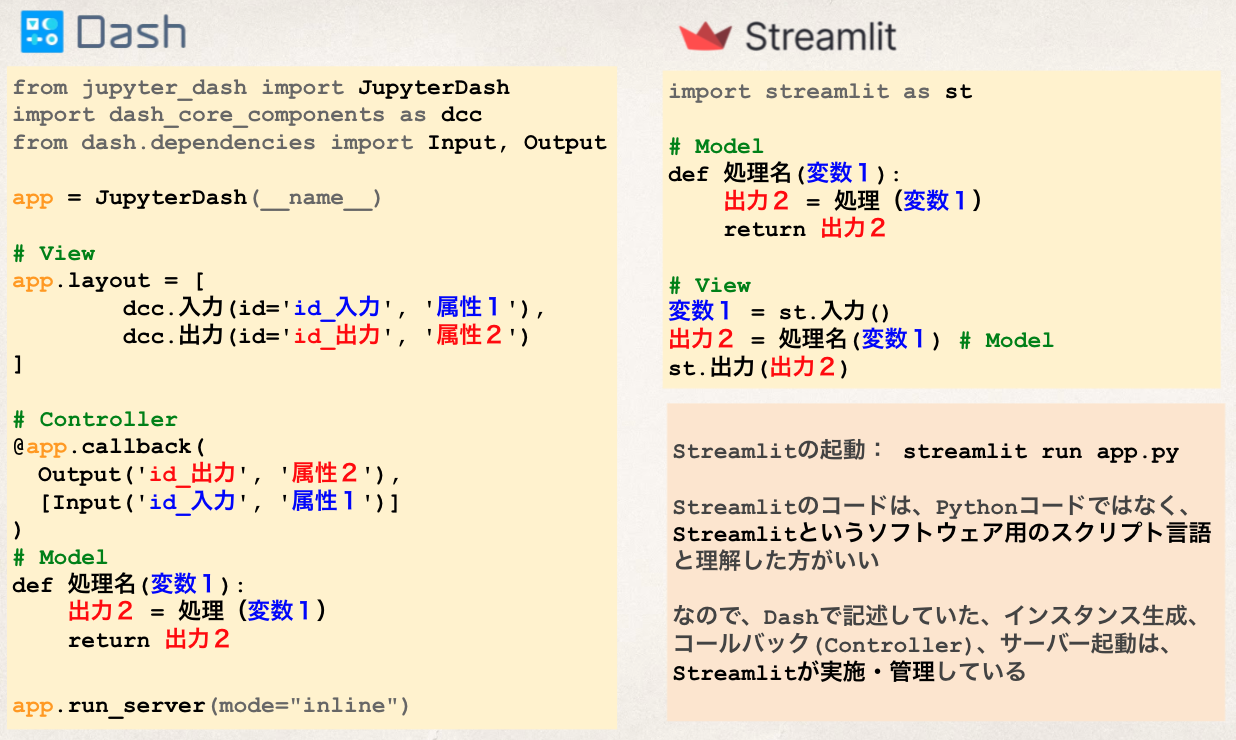

- Streamlitのコード app.py

```python
import streamlit as st
import requests
import pandas as pd

API_URL ="http://86f2f2211600.ngrok.io"

# Model
def get_report(key_word):
    if key_word == "":
        data = '[{"id":0, "report" : "キーワードを入れて下さい。"}]'
    elif "%" in key_word:
        data = '[{"id":0, "report" : "キーワードに「％」は使えません。"}]'
    else:
        query = '/api?key_word=' + key_word
        url = API_URL + query
        try:
            data = requests.get(url).json()
        except:
            data = '[{"id":0, "report" : "エラーが発生しました。"}]'
    if data == "[]":
        data = '[{"id":0, "report" : "該当する報告書はありません。"}]'
    df_out = pd.read_json(data)
    df_out = df_out[['id', 'report']]
    return df_out[::-1].head(20)

# View
st.title("委託調査報告書検索")
key_word = st.text_input("キーワード：", value='')
st.table(get_report(key_word))
```

# ２　Ｗｅｂアプリのデプロイ
- **実行する前に、APIサービスの 公開URL を app.py の API_URL に設定してください。** 
- streamlit appを バックグラウンド起動。　ログを書き出して後で起動確認できるようにもします。

In [ ]:
%%bash --bg
streamlit run /content/drive/MyDrive/0_HanPy41/2_APIサービス/app.py > debug.log 2>&1

- cloudflaredのインストール　＆　localhostの8501ポートのトンネリングしたアクセス用URLを発行

In [ ]:
!wget https://bin.equinox.io/c/VdrWdbjqyF/cloudflared-stable-linux-amd64.deb
!dpkg -i cloudflared-stable-linux-amd64.deb
!cloudflared tunnel --url localhost:8501